In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as skmetrics


In [6]:
farm = pd.read_csv('..\\data/farm.csv')


In [7]:
farm.head()


,Unnamed: 0,region,industry,aufwand,ertrag
0,1,111,3,115096,147652
1,2,111,5,75443,82920
2,3,111,2,378857,442726
3,4,111,1,433590,649628
4,5,111,2,347417,407836


Text(0, 0.5, 'ertrag')

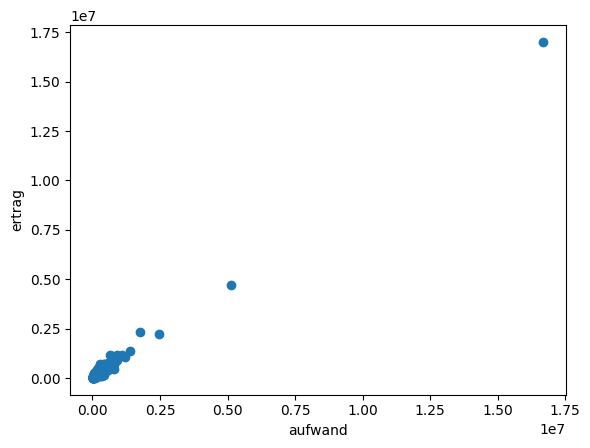

In [11]:
# plot aufwand vs ertrag
plt.scatter(farm['aufwand'], farm['ertrag'])
plt.xlabel('aufwand')
plt.ylabel('ertrag')


In [17]:
# multiple linear regression
from sklearn.linear_model import LinearRegression

X = farm[['aufwand', 'industry', 'region']]
y = farm['ertrag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)


0.917611965831792

Text(0, 0.5, 'ertrag')

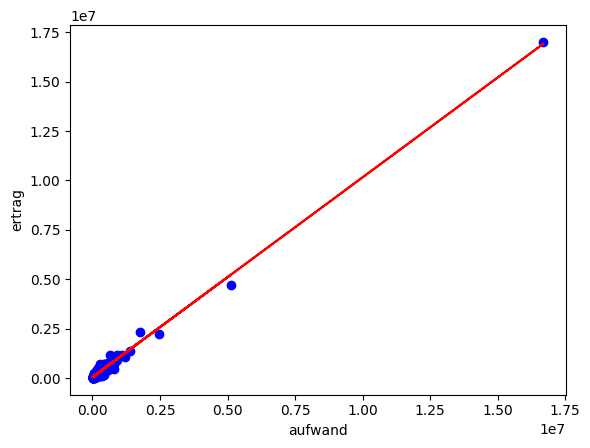

In [18]:
plt.scatter(farm['aufwand'], farm['ertrag'], color='blue')
plt.plot(farm['aufwand'], linear_model.predict(
    farm[['aufwand', 'industry', 'region']]), color='red')
plt.xlabel('aufwand')
plt.ylabel('ertrag')


In [22]:
linear_model.predict([[100000, 1, 111]])


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([160306.72302202])

Text(0, 0.5, 'residuals')

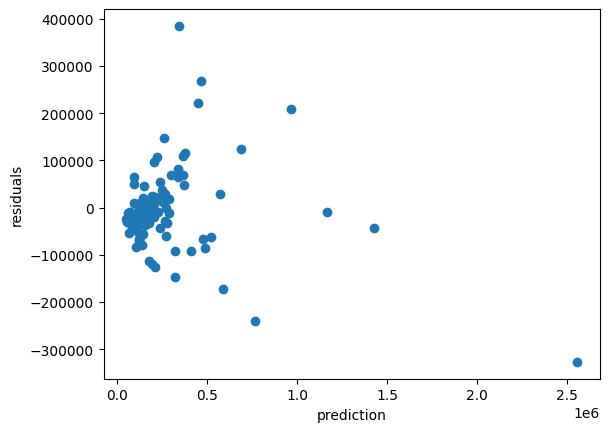

In [23]:
# make a residual analysis
y_pred = linear_model.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('prediction')
plt.ylabel('residuals')


In [44]:
# try with transformation
farm = pd.read_csv('..\\data/farm.csv')
farm['region'] = farm['region'].astype('category')
farm['industry'] = farm['industry'].astype('category')
# farm['aufwand'] = np.log(farm['aufwand'])
# farm['ertrag'] = np.log(farm['ertrag'])

X = farm[['aufwand', 'industry', 'region']]
y = farm['ertrag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)


0.8156798533431071

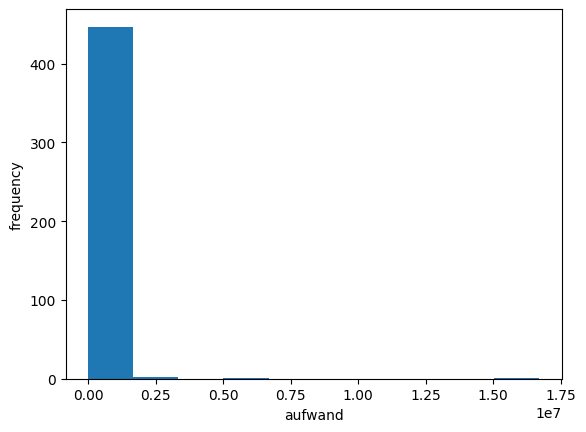

In [35]:
# histogram plot before np.log and after np.log
plt.hist(farm['aufwand'])
plt.xlabel('aufwand')
plt.ylabel('frequency')
plt.show()


Text(0.5, 0, 'aufwand')

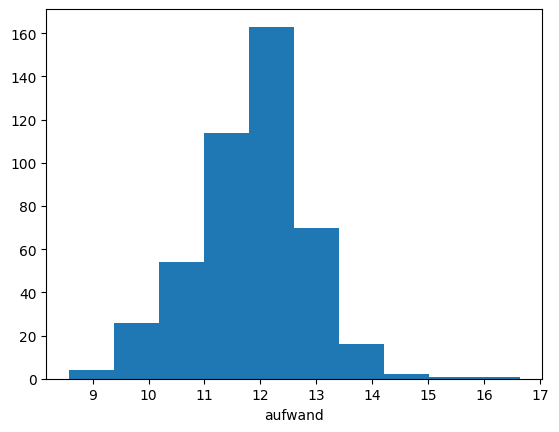

In [37]:
plt.hist(np.log(farm['aufwand']))
plt.xlabel('aufwand')


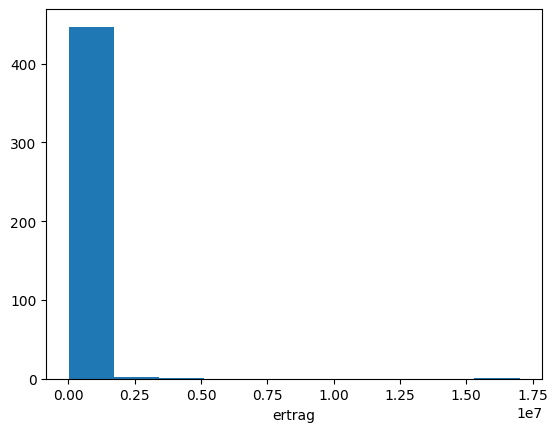

In [36]:
plt.hist(farm['ertrag'])
plt.xlabel('ertrag')
# plt.ylabel('frequency')
plt.show()


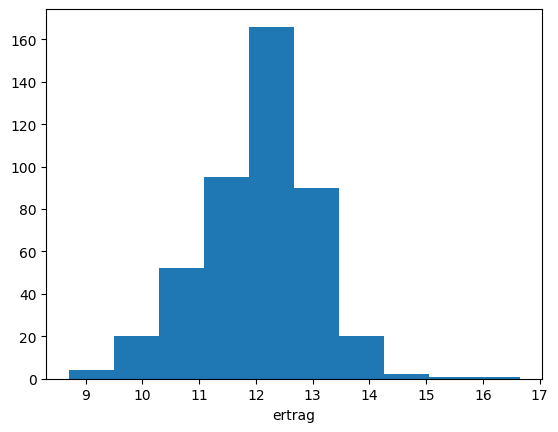

In [39]:
plt.hist(np.log(farm['ertrag']))
plt.xlabel('ertrag')
plt.show()


In [107]:
# try with transformation
farm = pd.read_csv('..\\data/farm.csv')
farm['region'] = farm['region'].astype('category')
farm['industry'] = farm['industry'].astype('category')
# add label to industrie
# farm['aufwand'] = np.log(farm['aufwand'
farm['aufwand'] = np.log(farm['aufwand'])
farm['ertrag'] = np.log(farm['ertrag'])


X = farm[['aufwand', 'industry', 'region']]
y = farm['ertrag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)


0.8638170128261156

In [84]:
predict = linear_model.predict([[10**5, 4, 111]])
np.exp(predict)


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\super\AppData\Local\Temp\ipykernel_20412\3527817923.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(predict)


array([inf])

In [119]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Load data
farm = pd.read_csv('..\\data/farm.csv')
farm['region'] = farm['region'].astype('category')
farm['industry'] = farm['industry'].astype('category')

# Transform data
farm['aufwand'] = np.log(farm['aufwand'])
farm['ertrag'] = np.log(farm['ertrag'])

# Split data into training and testing sets
X = farm[['aufwand', 'industry', 'region']]
y = farm['ertrag']


# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Print summary statistics
print('Intercept:', linear_model.intercept_)
print('Coefficients:', linear_model.coef_)
print('R-squared:', linear_model.score(X_train, y_train))


Intercept: 1.302395282117205
Coefficients: [ 9.10351911e-01 -1.08293968e-02 -2.27437576e-05]
R-squared: 0.8592959811504235


In [112]:
linear_model.predict([[10**5, 4, 111]])


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91036.44766714])

In [123]:
# Check for NaN values
print(farm.isna().sum())

Unnamed: 0      0
region          0
industry      451
aufwand         0
ertrag          0
dtype: int64


In [132]:
display(farm.head(10))


,Unnamed: 0,region,industry,aufwand,ertrag
0,1,111,3,11.653522,11.902613
1,2,111,5,11.231133,11.325632
2,3,111,2,12.844914,13.000706
3,4,111,1,12.979855,13.384155
4,5,111,2,12.758281,12.918620
5,6,111,5,12.699991,13.065939
6,7,111,2,13.479285,13.264509
7,8,111,3,12.307085,12.396131
8,9,111,3,12.396147,12.734389
9,10,111,3,12.179919,12.784440


In [164]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load data
farm = pd.read_csv('..\\data/farm.csv')
farm.head()

# Convert region and industry to categorical variables
# Transform data
farm['aufwand'] = np.log(farm['aufwand'])
farm['ertrag'] = np.log(farm['ertrag'])

# Fit linear regression model
X = farm[['aufwand', 'region', 'industry']]
X.columns = ['aufwand', 'region', 'industry']
y = farm['ertrag']
linear_model = LinearRegression()
linear_model.fit(X, y)

# Print summary statistics
print('Intercept:', linear_model.intercept_)
print('Coefficients:', linear_model.coef_)
print('R-squared:', linear_model.score(X, y))

# Predict new data


# check and print nan

predi = linear_model.predict([[10**5, 4, 111]])

print(predi)
# print('Predicted ertrag:', np.exp(predi))


Intercept: 1.141876876121115
Coefficients: [ 9.17955991e-01  4.99022184e-04 -5.66043107e-03]
R-squared: 0.863773160129138
[91796.11470025]


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Predict new data
newdat = pd.DataFrame({'aufwand': [10**5], 'region': ['4'], 'industry': ['Rind']})
newdat['region'] = pd.Categorical(newdat['region'], categories=farm['region'].cat.categories)
newdat['industry'] = pd.Categorical(newdat['industry'], categories=farm['industry'].cat.categories)
newdat['aufwand'] = np.log(newdat['aufwand'])
predi = linear_model.predict(newdat)
print('Predicted ertrag:', np.exp(predi))

In [ ]:
# Check for NaN values
print(farm.isna().sum())


In [165]:
# Predict new data
newdat = pd.DataFrame({'aufwand': [10**5], 'region': ['4'], 'industry': ['Rind']})
newdat['region'] = pd.Categorical(newdat['region'], categories=farm['region'].cat.categories)
newdat['industry'] = pd.Categorical(newdat['industry'], categories=farm['industry'].cat.categories)
newdat['aufwand'] = np.log(newdat['aufwand'])
predi = linear_model.predict(newdat)
print('Predicted ertrag:', np.exp(predi))

AttributeError: Can only use .cat accessor with a 'category' dtype

In [ ]:
# Predict new data
newdat = pd.DataFrame({'aufwand': [10**5], 'region': ['4'], 'industry': ['Rind']})
newdat['region'] = pd.Categorical(newdat['region'], categories=farm['region'].cat.categories)
newdat['industry'] = pd.Categorical(newdat['industry'], categories=farm['industry'].cat.categories)
newdat['aufwand'] = np.log(newdat['aufwand'])
predi = linear_model.predict(newdat)
print('Predicted ertrag:', np.exp(predi))